In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""
columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())
columns.append('target')
print(len(columns))

c2 = columns.copy()
c2.append('diff')


42


In [ ]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
'mscan' : 'probe',
'apache2': 'normal',
'processtable' : 'dos' ,
'snmpguess': 'probe' ,
'saint' : 'probe' ,
'mailbomb' : 'dos' ,
'snmpgetattack' : 'probe' ,
'httptunnel' : 'probe' ,
'named' : 'normal' ,
'sendmail' : 'normal' ,
'xterm' : 'normal' ,
'xlock' : 'normal' ,
'xsnoop' : 'probe' ,
'worm' : 'r21' ,
'udpstorm' : 'dos' ,
'sqlattack' : 'u2r' ,
}

In [ ]:
#path = "/content/drive/MyDrive/ML_project/kddcup.data_10_percent.gz"
df1 = pd.read_csv("/content/drive/MyDrive/ML_project/kddcup.data_10_percent.gz",names=columns)
df2 = pd.read_csv("drive/MyDrive/ML_project/df2.txt" , header = None , names = c2 )
#df1['target'].value_counts()

In [ ]:
df1['target']= df1['target'].replace("smurf.","smurf")
df1['target']= df1['target'].replace("neptune.","neptune")
df1['target']= df1['target'].replace("normal.","normal")
df1['target']= df1['target'].replace("back.","back")
df1['target']= df1['target'].replace("satan.","satan")
df1['target']= df1['target'].replace("ipsweep.","ipsweep")
df1['target']= df1['target'].replace("portsweep.","portsweep")
df1['target']= df1['target'].replace("warezclient.","warezclient")
df1['target']= df1['target'].replace("teardrop.","teardrop")
df1['target']= df1['target'].replace("pod.","pod")
df1['target']= df1['target'].replace("nmap.","nmap")
df1['target']= df1['target'].replace("guess_passwd.","guess_passwd")
df1['target']= df1['target'].replace("buffer_overflow.","buffer_overflow")
df1['target']= df1['target'].replace("land.","land")
df1['target']= df1['target'].replace("warezmaster.","warezmaster")
df1['target']= df1['target'].replace("imap.","imap")
df1['target']= df1['target'].replace("warezmaster.","warezmaster")
df1['target']= df1['target'].replace("rootkit.","rootkit")
df1['target']= df1['target'].replace("loadmodule.","loadmodule")
df1['target']= df1['target'].replace("ftp_write.","ftp_write")
df1['target']= df1['target'].replace("multihop.","multihop")
df1['target']= df1['target'].replace("phf.","phf")
df1['target']= df1['target'].replace("perl.","perl")
df1['target']= df1['target'].replace("spy.","spy")

df2 =df2.drop('diff' , axis = 1)

In [ ]:
# drop duplicate rows from the dataframe

df = pd.concat([df1,df2])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.00,0.00,0.11,0.0,0.00,0.0,0.00,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.00,0.00,0.05,0.0,0.00,0.0,0.00,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.00,0.00,0.03,0.0,0.00,0.0,0.00,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.00,0.00,0.03,0.0,0.00,0.0,0.00,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.00,0.00,0.02,0.0,0.00,0.0,0.00,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune


In [ ]:
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r])

In [ ]:
df['Attack Type'].value_counts()

dos       437385
normal    164621
probe      15763
r2l         2121
u2r          104
Name: Attack Type, dtype: int64

Text(0.5, 1.0, 'Count of Different Targets')

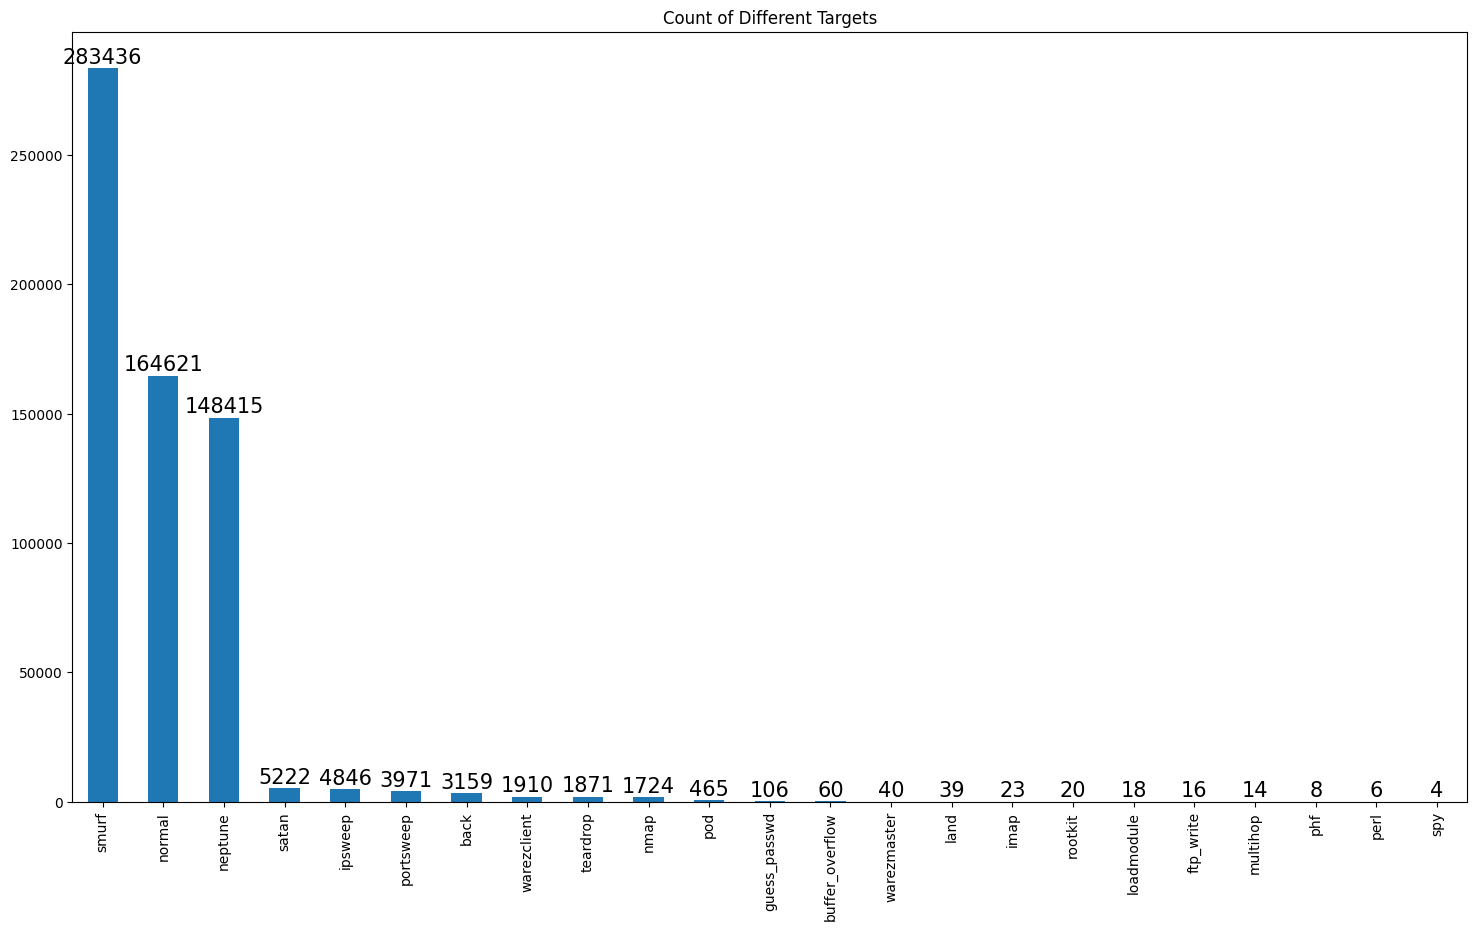

In [ ]:
plt.figure(figsize=(18,10))
plots = df['target'].value_counts().plot(kind="bar")
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Count of Different Targets")

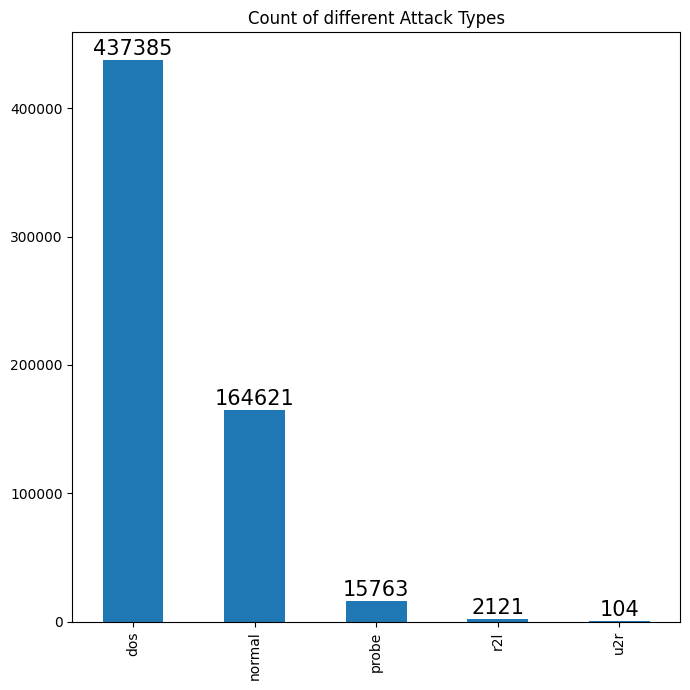

In [ ]:
plt.figure(figsize=(7,7))
plots = df['Attack Type'].value_counts().plot(kind="bar")
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Count of different Attack Types")
plt.tight_layout()

In [ ]:
df.isnull().sum()
# THEREFORE NO MISSINGVALUES

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Text(0.5, 0.98, 'Analysing the categorical attributes')

<Figure size 1500x800 with 0 Axes>

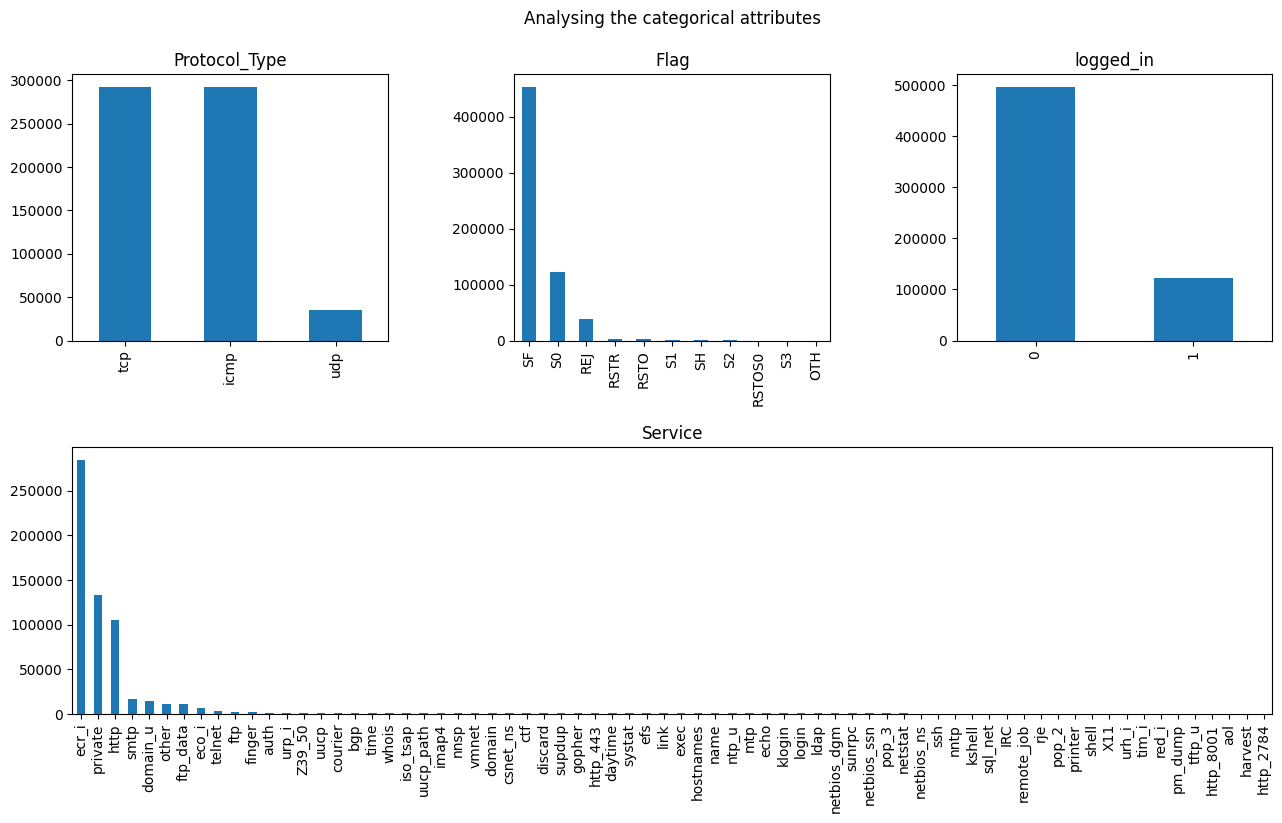

In [ ]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

plt.figure(figsize = (15,8))
fig, axs = plt.subplots(ncols=2, nrows=2,figsize = (15,8))
gs = axs[1, 0].get_gridspec()
plt.subplot(2,3,1)
bar_graph('protocol_type')
plt.title('Protocol_Type')
plt.subplot(2,3,2)
bar_graph('flag')
plt.title('Flag')
plt.subplot(2,3,3)
bar_graph('logged_in')
plt.title('logged_in')
for ax in axs[1,:]:
    ax.remove()
axbig = fig.add_subplot(gs[1,:])
bar_graph('service')
plt.title('Service')
fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.suptitle("Analysing the categorical attributes")

In [ ]:

df = df.dropna('columns')
df = df[[col for col in df if df[col].nunique() > 1]]
df.shape

(619994, 42)

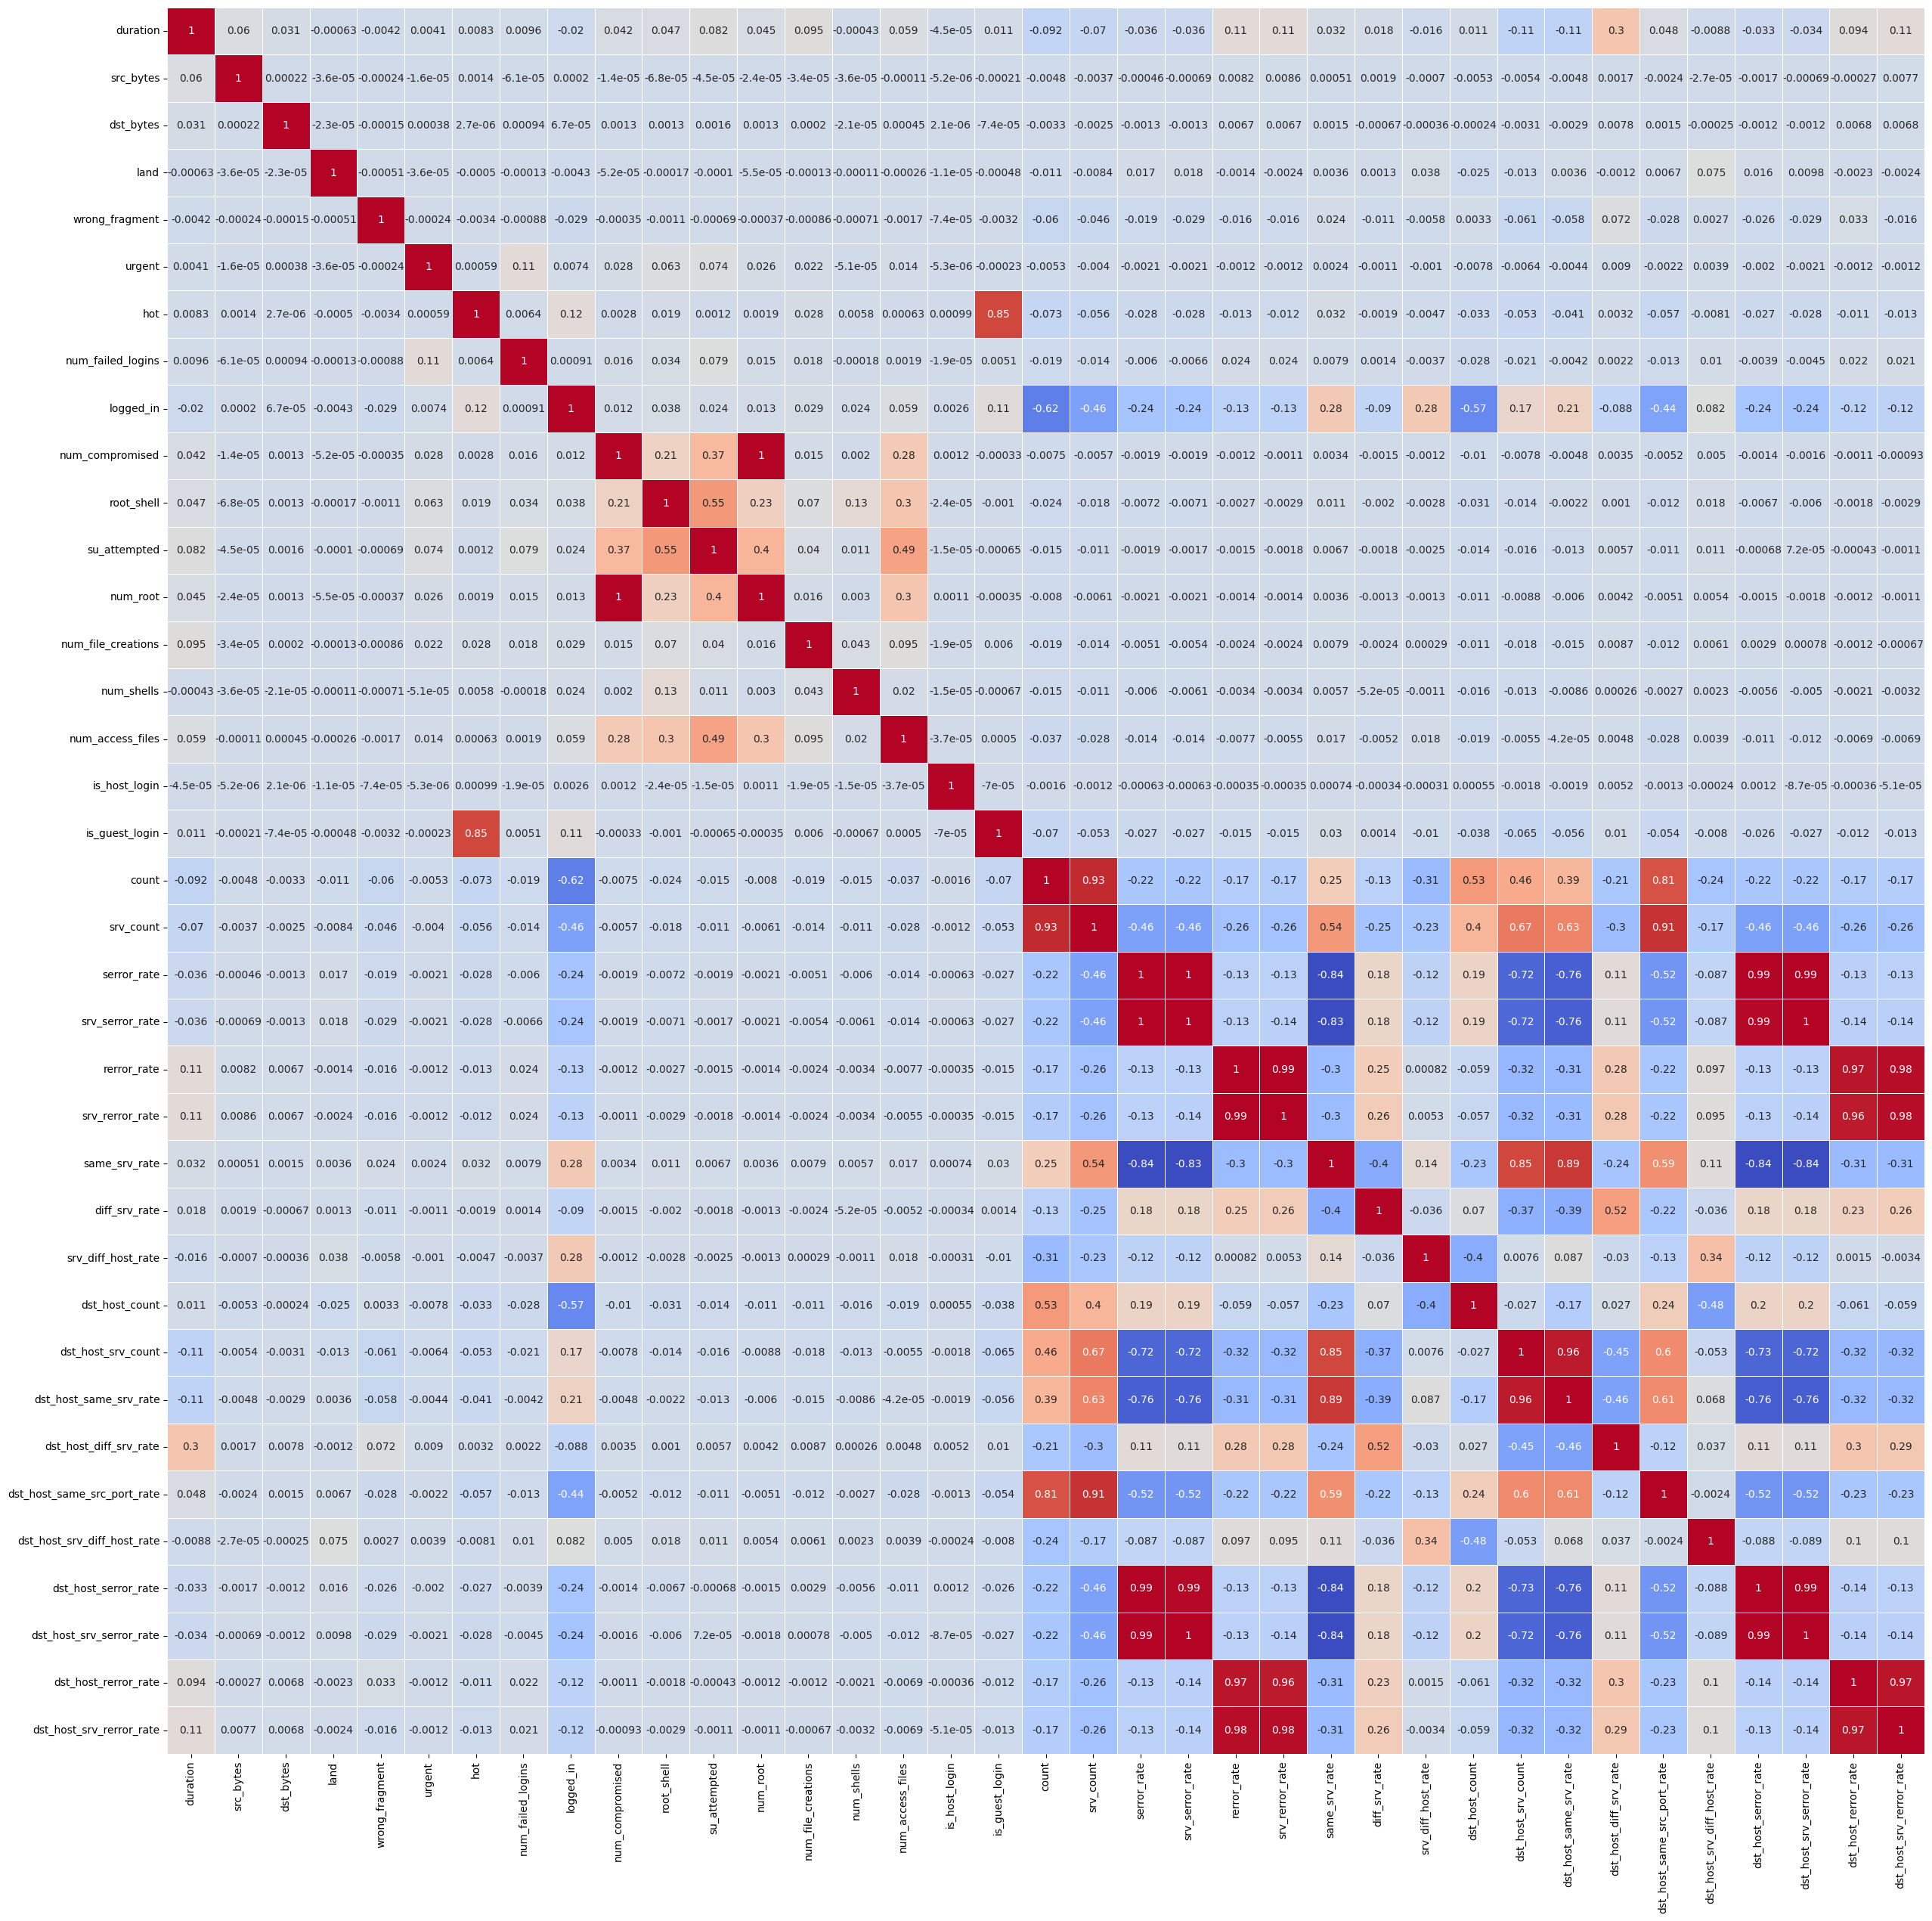

In [ ]:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,cmap='coolwarm',annot=True,linewidths=.5, cbar=False)
plt.show()

In [ ]:
df_copy = df.copy()

for col1 in df.columns:
    for col2 in df.columns:
        # Skip if the same column or if already dropped
        if col1 == col2 or col1 not in df_copy.columns or col2 not in df_copy.columns:
            continue

        # Check if both columns are numeric
        if pd.api.types.is_numeric_dtype(df_copy[col1]) and pd.api.types.is_numeric_dtype(df_copy[col2]):
            # Calculate the correlation between the two columns
            correlation = df_copy[col1].corr(df_copy[col2])

            # If correlation exceeds the threshold, drop one of the columns
            if correlation > 0.975:
                if col1 in df_copy.columns:
                    df_copy = df_copy.drop(col1, axis=1)
                elif col2 in df_copy.columns:
                    df_copy = df_copy.drop(col2, axis=1)

# df_copy now contains the modified DataFrame with correlated columns dropped

df=df_copy.copy()
df.shape

(619994, 36)

In [ ]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

In [ ]:
df['protocol_type'].value_counts()
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [ ]:
df['flag'].value_counts()

SF        453385
S0        121858
REJ        38108
RSTR        3324
RSTO        2141
S1           422
SH           378
S2           151
RSTOS0       114
S3            59
OTH           54
Name: flag, dtype: int64

In [ ]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'S1':5 ,'SH':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,normal,normal
1,0,1,http,0,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,normal,normal
2,0,1,http,0,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,normal,normal
3,0,1,http,0,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,normal,normal
4,0,1,http,0,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,normal,normal


In [ ]:
df.drop('service',axis = 1,inplace= True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

# sc = MinMaxScaler()
# X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(619994, 34)
(415395, 33) (204599, 33)
(415395, 1) (204599, 1)


Feature ranking:
1. feature 4 (0.175502)-dst_bytes
2. feature 19 (0.141819)-count
3. feature 10 (0.083129)-logged_in
4. feature 20 (0.061154)-srv_count
5. feature 3 (0.059471)-src_bytes
6. feature 29 (0.056961)-dst_host_srv_diff_host_rate
7. feature 24 (0.056045)-dst_host_count
8. feature 1 (0.053638)-protocol_type
9. feature 22 (0.049370)-diff_srv_rate
10. feature 28 (0.043362)-dst_host_same_src_port_rate
11. feature 2 (0.042854)-flag
12. feature 21 (0.040613)-same_srv_rate
13. feature 27 (0.030144)-dst_host_diff_srv_rate
14. feature 26 (0.018269)-dst_host_same_srv_rate
15. feature 25 (0.018190)-dst_host_srv_count
16. feature 23 (0.016761)-srv_diff_host_rate
17. feature 30 (0.013140)-dst_host_srv_serror_rate
18. feature 32 (0.009596)-dst_host_srv_rerror_rate
19. feature 31 (0.009370)-dst_host_rerror_rate
20. feature 8 (0.007136)-hot
21. feature 0 (0.007126)-duration
22. feature 6 (0.004965)-wrong_fragment
23. feature 18 (0.000740)-is_guest_login
24. feature 9 (0.000239)-num_failed_log

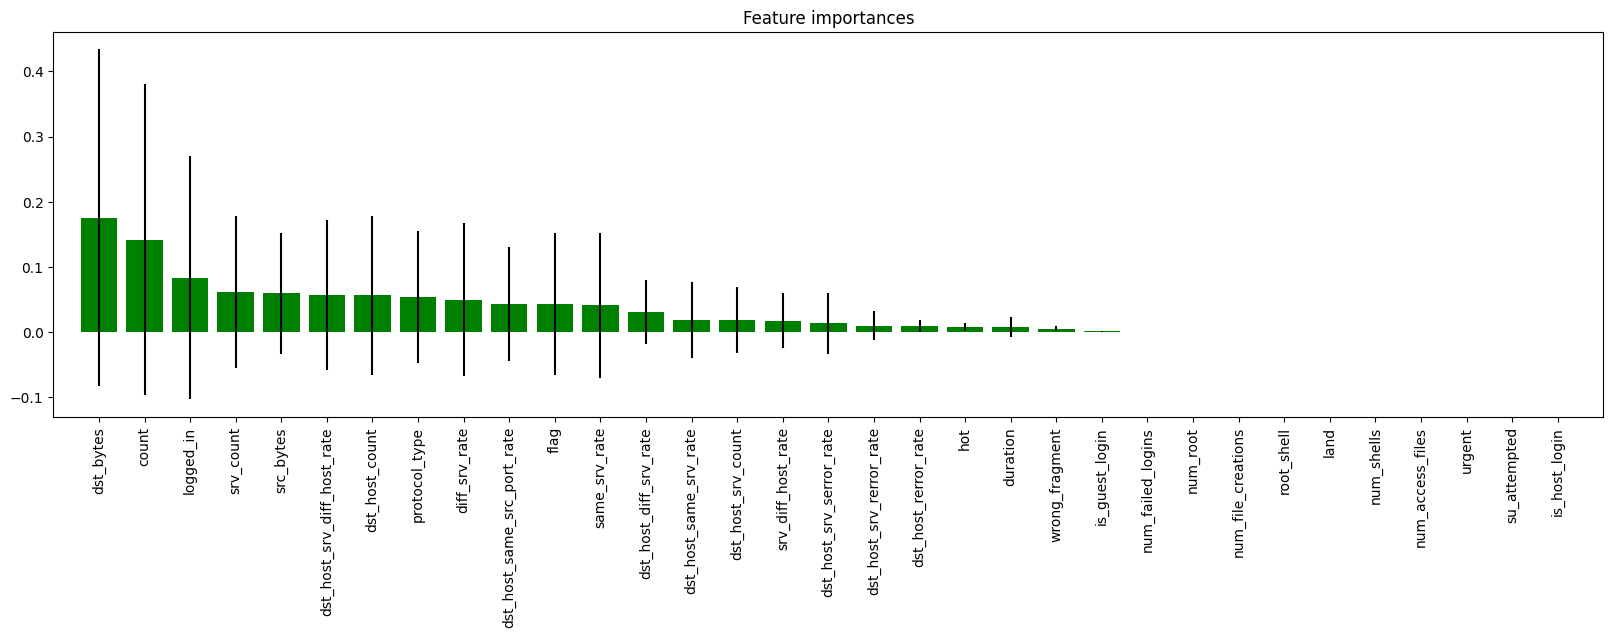

In [ ]:
from sklearn.ensemble import RandomForestClassifier


clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(X_train,Y_train)

importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),end='-')
    print(X_train.columns[indices[f]])

# Plot the feature importances of the forest

plt.figure(1, figsize=(20, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])

plt.show()

In [ ]:
# dropping the columns with less than 0.0001 importance
df.drop('su_attempted',axis = 1,inplace= True)
df.drop('is_host_login',axis = 1,inplace= True)
df.drop('urgent',axis = 1,inplace= True)
df.drop('num_access_files',axis = 1,inplace= True)
df.drop('num_shells',axis = 1,inplace= True)
df.drop('land',axis = 1,inplace= True)
df.drop('root_shell',axis = 1,inplace= True)
df.drop('num_file_creations',axis = 1,inplace= True)

In [ ]:
# need to define X_train , Y_train , X_test , Y_test again
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(415395, 25) (204599, 25)
(415395, 1) (204599, 1)


In [ ]:
X_train.shape

(415395, 25)

In [ ]:
from sklearn.metrics import accuracy_score

test_accuracies = []
t = X_train
t_2 = X_test

to_be_removed = []
for f in X_train.columns:
    to_be_removed.append(f)

In [ ]:
for i in to_be_removed:
    clf_rf = RandomForestClassifier(random_state=43)
    clr_rf = clf_rf.fit(t,Y_train)
    test_ac = accuracy_score(Y_test,clf_rf.predict(t_2))
    test_accuracies.append(test_ac)
    t = t.drop(i,axis=1)
    t_2 = t_2.drop(i,axis=1)

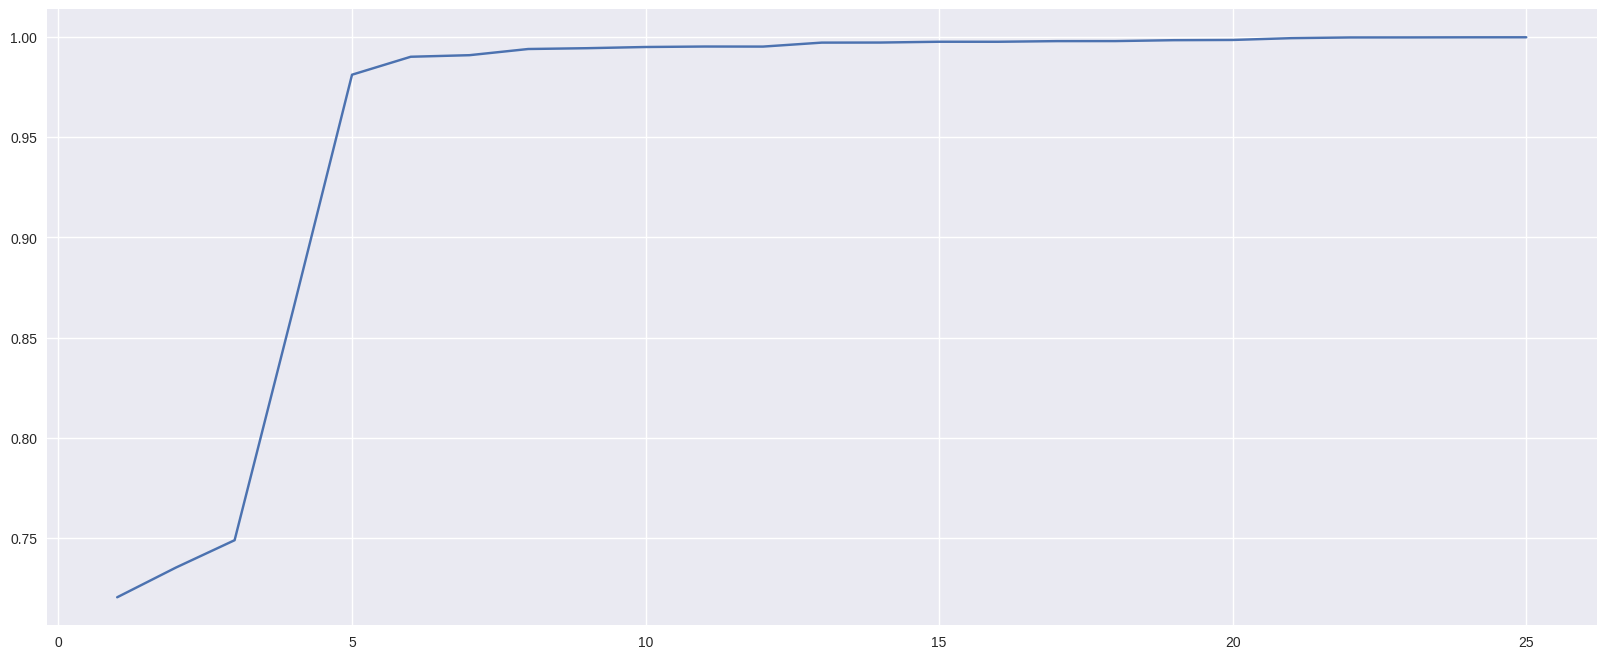

In [ ]:
plt.style.use("seaborn")
plt.figure(figsize=(20,8))
x_place = [25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
plt.plot(x_place,test_accuracies)
plt.show()

In [ ]:
for i in range(25,0,-1):
    print(str(i)+" - "+str(test_accuracies[25-i]))

25 - 0.9997849451854603
24 - 0.9997702823571962
23 - 0.9997165186535614
22 - 0.999696968215876
21 - 0.9993450603375383
20 - 0.9984506278134302
19 - 0.998338212796739
18 - 0.9978885527299742
17 - 0.9978641146828675
16 - 0.9975464200704793
15 - 0.997556195289322
14 - 0.9971602989261922
13 - 0.9971211980508213
12 - 0.9951417162351722
11 - 0.9951710418917004
10 - 0.9949364366394753
9 - 0.9943401482900699
8 - 0.9939344767080973
7 - 0.9908552827726431
6 - 0.9900732652652261
5 - 0.981119164805302
4 - 0.864241760712418
3 - 0.749001705775688
2 - 0.7353555002712623
1 - 0.7205460437245539


We can see that after around using 17 features that accuracy of the system changes very little, so we will use those 17 features

In [ ]:
# dropped featues
X_train

,duration,protocol_type,flag,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,logged_in,num_root,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
291368,0,0,0,1032,0,0,0,0,0,0,...,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0
178720,0,0,0,1032,0,0,0,0,0,0,...,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0
229949,0,0,0,1032,0,0,0,0,0,0,...,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0
109334,0,1,1,0,0,0,0,0,0,0,...,0.0,255,20,0.08,0.08,0.0,0.0,1.0,0.0,0.0
493516,0,1,0,340,295,0,0,0,1,0,...,0.0,255,255,1.00,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0,1,1,0,0,0,0,0,0,0,...,0.0,255,14,0.05,0.07,0.0,0.0,1.0,0.0,0.0
259178,0,0,0,1032,0,0,0,0,0,0,...,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0
365838,0,1,1,0,0,0,0,0,0,0,...,0.0,255,8,0.03,0.06,0.0,0.0,1.0,0.0,0.0
131932,0,0,0,1032,0,0,0,0,0,0,...,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_train = X_train.drop(['hot','duration','wrong_fragment','is_guest_login','num_failed_logins'],axis=1)

In [ ]:
X_test = X_test.drop(['hot','duration','wrong_fragment','is_guest_login','num_failed_logins'] ,axis=1)

# Modelling

In [ ]:
acc_train = []
acc_test = []
pres_train = []
pres_test = []
rec_train = []
rec_test = []
f1_train = []
f1_test = []
train_time = []
test_time = []
confusion_matrixs = []

In [ ]:
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def classification_model_report(model,name,n):
  #Fit the model:
  model = model.fit(X_train,Y_train)

  #Make predictions on training set:
  start_time = time.time()
  pred_train = model.predict(X_train)
  end_time = time.time()
  train_time_model = end_time-start_time
  train_time.append(train_time_model)

  start_time = time.time()
  pred_test = model.predict(X_test)
  end_time = time.time()
  test_time_model = end_time-start_time
  test_time.append(test_time_model)

  #Print accuracy
  ac_train = accuracy_score(Y_train,pred_train)
  ac_test = accuracy_score(Y_test,pred_test)
  acc_train.append(ac_train)
  acc_test.append(ac_test)


  #Print precision
  pr_train = precision_score(Y_train, pred_train,average="micro")
  pr_test = precision_score(Y_test, pred_test,average="micro")
  pres_train.append(pr_train)
  pres_test.append(pr_test)

  #Print recall
  re_train = recall_score(Y_train, pred_train,average="micro")
  re_test = recall_score(Y_test, pred_test,average="micro")
  rec_train.append(re_train)
  rec_test.append(re_test)

  #Print f1_score
  f_train = f1_score(Y_train, pred_train,average="micro")
  f_test = f1_score(Y_test, pred_test,average="micro")
  f1_train.append(f_train)
  f1_test.append(f_test)

  #confusion matrix
  cm = confusion_matrix(Y_test,pred_test)
  confusion_matrixs.append(cm)

  if n==1:
    print("|| "+name+" ||\n")
    print("------------------------------------------------------------------------------------------------------------------------------\n")
    print("Trainning\n")
    print("Time: ",train_time_model, end=" || ")
    print("Accuracy: ",round(ac_train,5), end=" || ")
    print("Precision: ",round(pr_train,5), end=" || ")
    print("Recall: ",round(re_train,5), end=" || ")
    print("f1_score: ",round(f_train,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")
    print("Testing\n")
    print("Time: ",test_time_model, end=" || ")
    print("Accuracy: ",round(ac_test,5), end=" || ")
    print("Precision: ",round(pr_test,5), end=" || ")
    print("Recall: ",round(re_test,5), end=" || ")
    print("f1_score: ",round(f_test,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_name = ['Gaussian NaiveBayes','Decision Tree','RandomForest','SVM','LogisticRegression','GradientBoosting']
model1 = GaussianNB()
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model3 = RandomForestClassifier(n_estimators=30)
model4 = SVC(gamma = 'scale')
model5 = LogisticRegression(max_iter=1200000)
model6 = GradientBoostingClassifier(random_state=0)
models = [model1,model2,model3,model4,model5,model6]

In [ ]:
classification_model_report(models[0],model_name[0],0)

In [ ]:
classification_model_report(models[1],model_name[1],0)

In [ ]:
classification_model_report(models[2],model_name[2],0)

In [ ]:
classification_model_report(models[3],model_name[3],0)

In [ ]:
classification_model_report(models[4],model_name[4],0)

In [ ]:
classification_model_report(models[5],model_name[5],0)

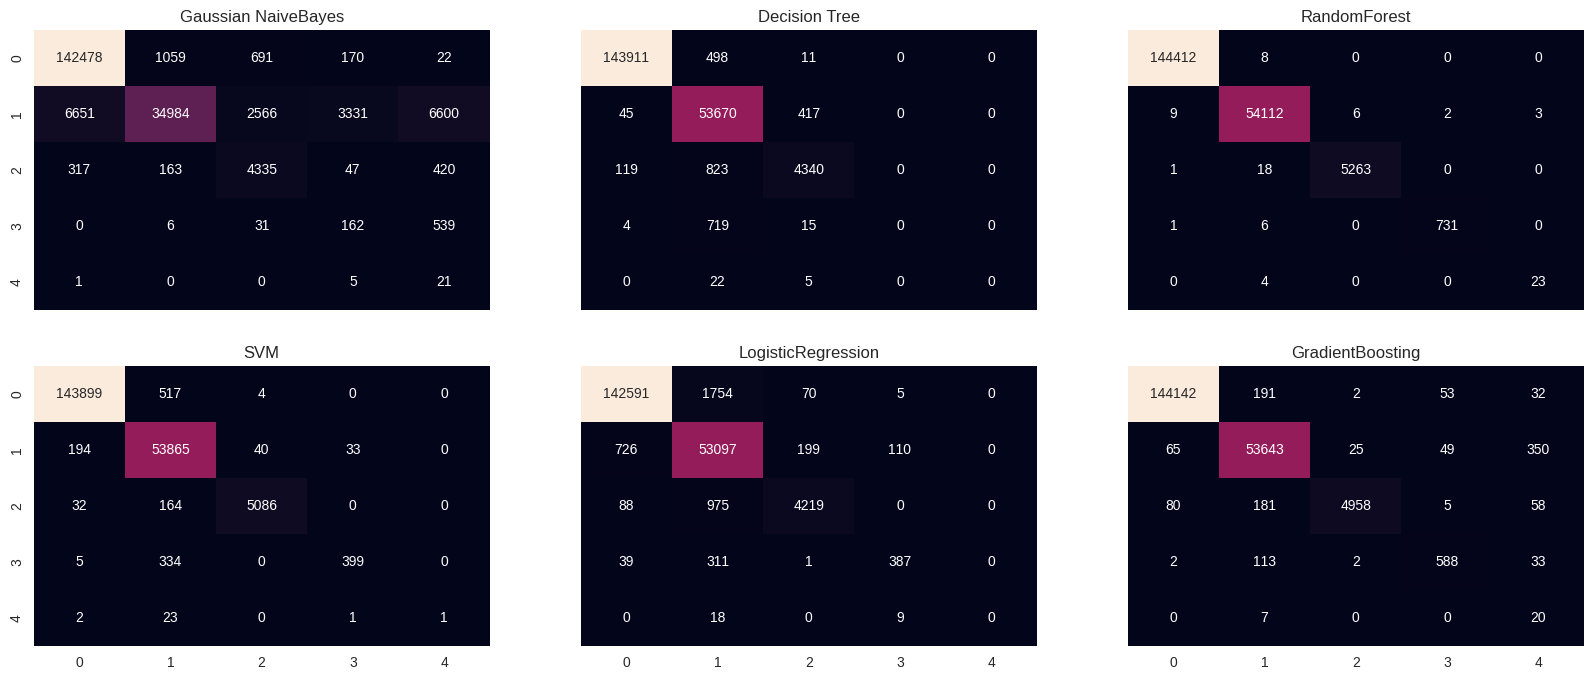

In [ ]:
plt.subplots(ncols=3, nrows=2,figsize=(20,8),sharey=True,sharex=True)
for i in range(1,7):
    plt.subplot(2,3,i)
    sns.heatmap(confusion_matrixs[i-1],annot=True,fmt="d",cbar=False)
    plt.title(model_name[i-1])

In [ ]:
for i in range(len(model_name)):
    print(model_name[i]+" : "+str(acc_test[i]*100))

Gaussian NaiveBayes : 88.94471624983504
Decision Tree : 98.69109819696088
RandomForest : 99.97165186535614
SVM : 99.34066148905909
LogisticRegression : 97.89588414410628
GradientBoosting : 99.39002634421477


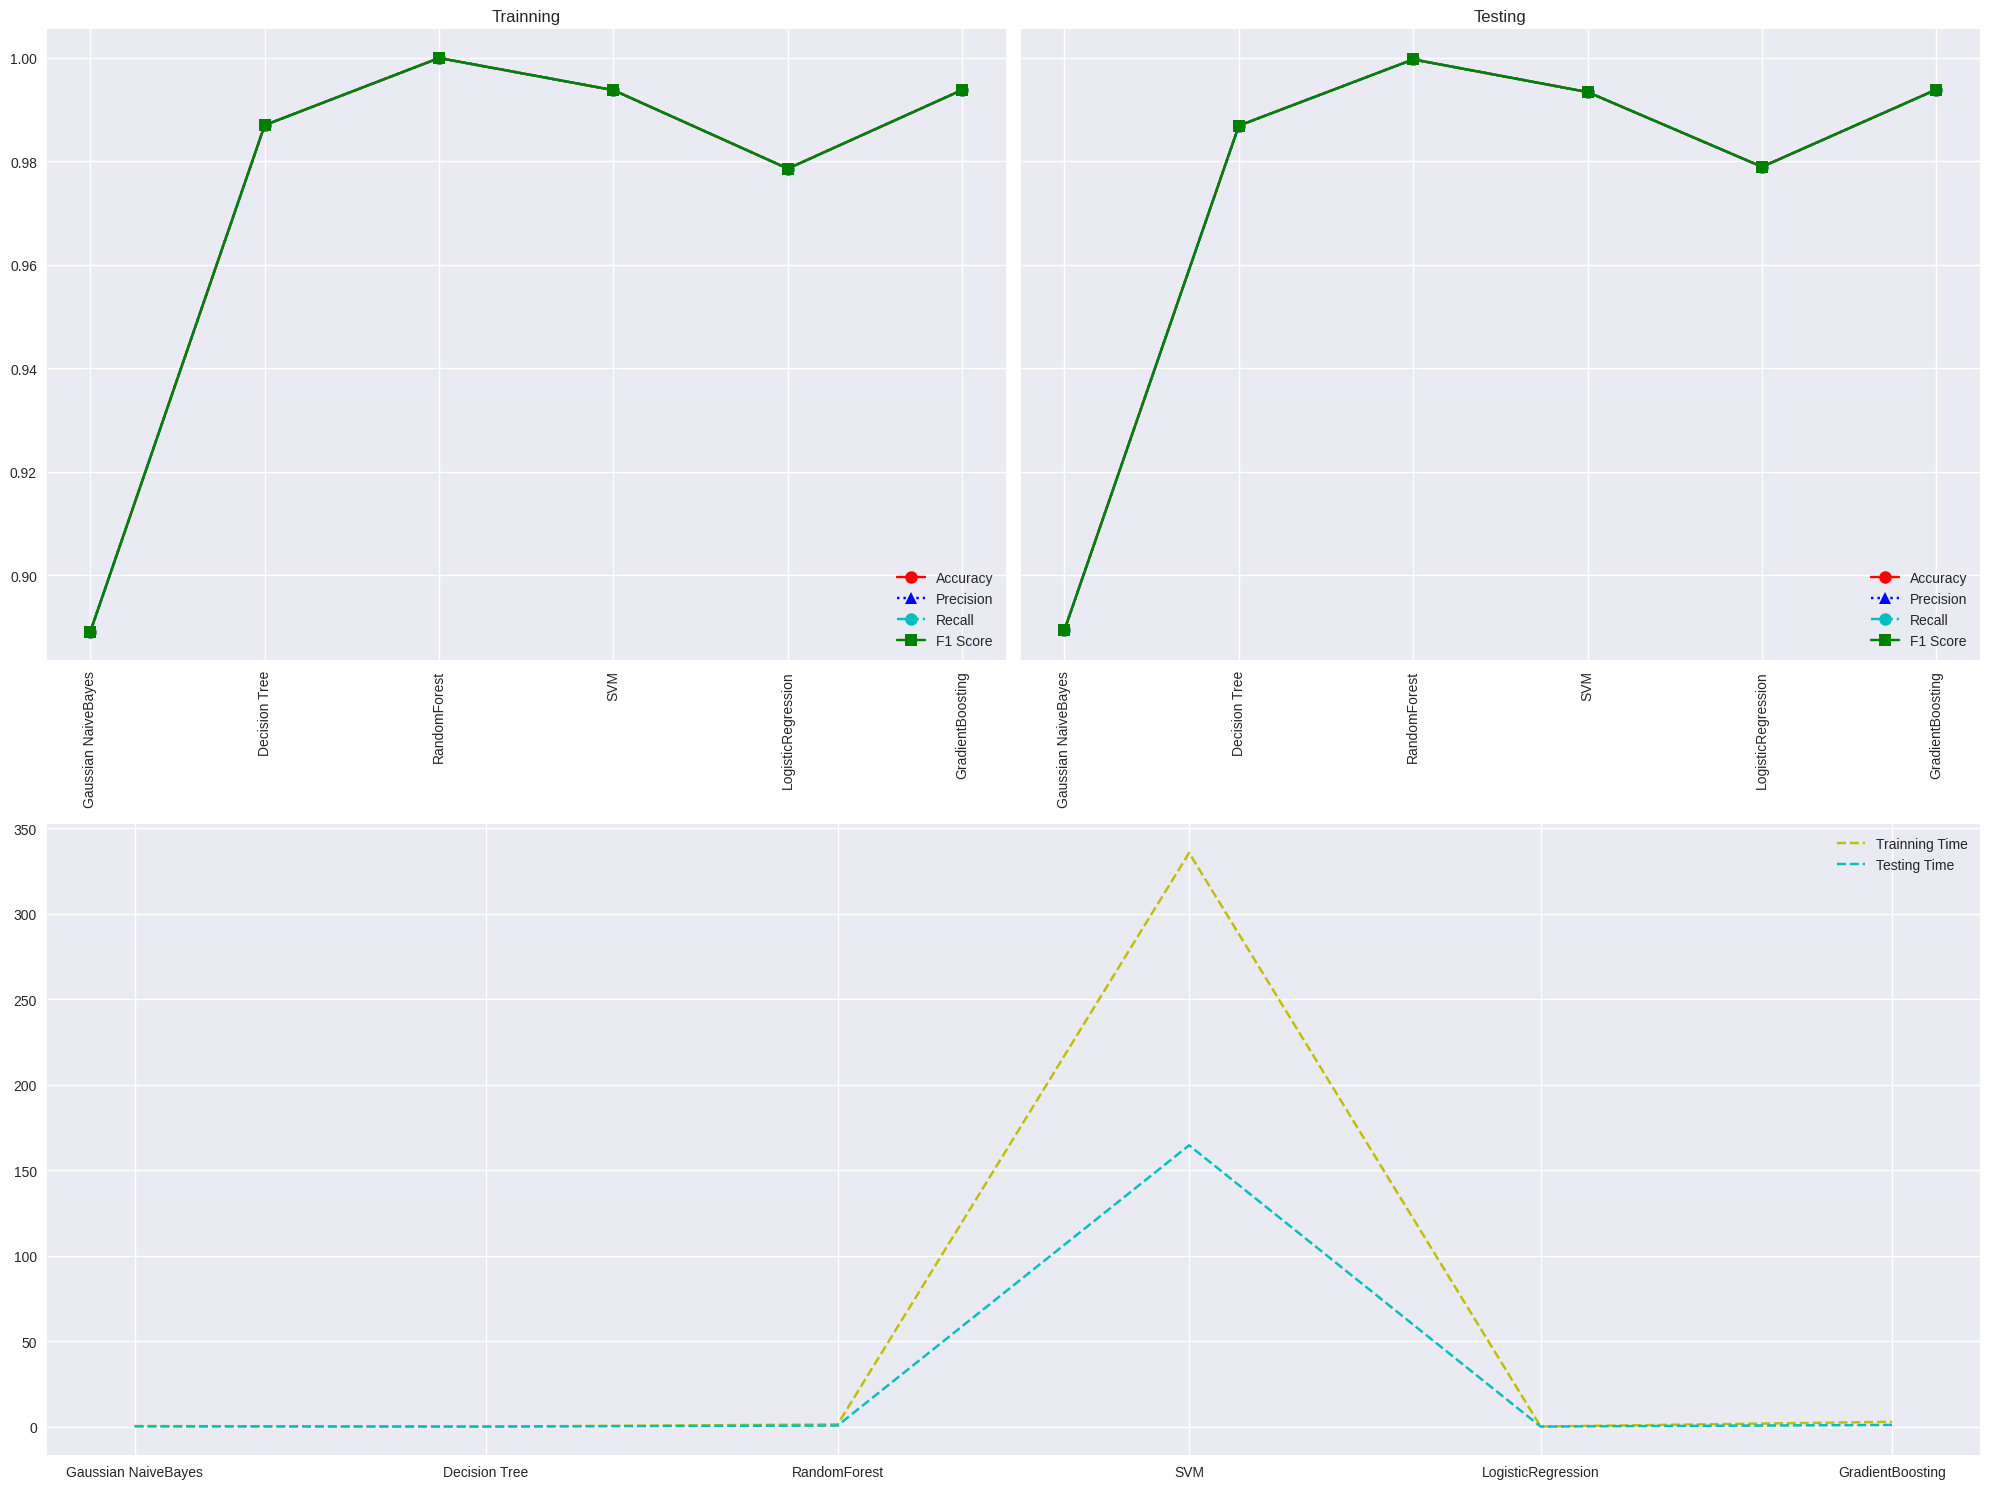

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(20,15),sharey=True)
gs = axs[1, 0].get_gridspec()
plt.subplot(2,2,1)
plt.plot(model_name,acc_train,'r',marker='o', markersize=9)
plt.plot(model_name,pres_train,'b:',marker='^', markersize=9)
plt.plot(model_name,rec_train,'c--',marker='o', markersize=9)
plt.plot(model_name,f1_train,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Trainning")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

plt.subplot(2,2,2)
plt.plot(model_name,acc_test,'r',marker='o', markersize=9)
plt.plot(model_name,pres_test,'b:',marker='^', markersize=9)
plt.plot(model_name,rec_test,'c--',marker='o', markersize=9)
plt.plot(model_name,f1_test,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Testing")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

for ax in axs[1,:]:
    ax.remove()
axbig = fig.add_subplot(gs[1,:])

plt.plot(model_name,train_time,'y--')
plt.plot(model_name,test_time,'c--')
plt.legend(['Trainning Time','Testing Time'],loc ="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def estimate_creator(l):
    estm = []
    for i in l:
        estm.append((model_name[i],models[i]))
    return estm

In [ ]:
from sklearn.ensemble import StackingClassifier

l = [[0,1,2],[1,2,5],[0,2,5]]

estimator_list = []
for i in range(len(l)):
    estimator_list.append(estimate_creator(l[i]))

# Build stack model
stack_model_list = []
for i in range(len(l)):
    stack_model_list.append(StackingClassifier(estimators=estimator_list[i], final_estimator=LogisticRegression()))

stack_model_name = []
for i in range(len(l)):
    stack_model_name.append(str("Meta Model "+str(i+1)))

In [ ]:
stack_acc_train = []
stack_acc_test = []
stack_pres_train = []
stack_pres_test = []
stack_rec_train = []
stack_rec_test = []
stack_f1_train = []
stack_f1_test = []
stack_train_time = []
stack_test_time = []
stack_confusion_matrixs = []
test_prediction = []
train_prediction = []

In [ ]:
def stack_classification_model_report(model,name,n):
  #Fit the model:
  model = model.fit(X_train,Y_train)

  #Make predictions on training set:
  start_time = time.time()
  pred_train = model.predict(X_train)
  end_time = time.time()
  train_time_model = end_time-start_time
  stack_train_time.append(train_time_model)
  train_prediction.append(pred_train)

  start_time = time.time()
  pred_test = model.predict(X_test)
  end_time = time.time()
  test_time_model = end_time-start_time
  stack_test_time.append(test_time_model)
  test_prediction.append(pred_test)

  #Print accuracy
  ac_train = accuracy_score(Y_train,pred_train)
  ac_test = accuracy_score(Y_test,pred_test)
  stack_acc_train.append(ac_train)
  stack_acc_test.append(ac_test)

  #Print precision
  pr_train = precision_score(Y_train, pred_train,average="macro")
  pr_test = precision_score(Y_test, pred_test,average="macro")
  stack_pres_train.append(pr_train)
  stack_pres_test.append(pr_test)

  #Print recall
  re_train = recall_score(Y_train, pred_train,average="macro")
  re_test = recall_score(Y_test, pred_test,average="macro")
  stack_rec_train.append(re_train)
  stack_rec_test.append(re_test)

  #Print f1_score
  f_train = f1_score(Y_train, pred_train,average="macro")
  f_test = f1_score(Y_test, pred_test,average="macro")
  stack_f1_train.append(f_train)
  stack_f1_test.append(f_test)

  #confusion matrix
  cm = confusion_matrix(Y_test,pred_test)
  stack_confusion_matrixs.append(cm)

  if n==1:
    print("|| "+name+" ||\n")
    print("------------------------------------------------------------------------------------------------------------------------------\n")
    print("Trainning\n")
    print("Time: ",train_time_model, end=" || ")
    print("Accuracy: ",round(ac_train,5), end=" || ")
    print("Precision: ",round(pr_train,5), end=" || ")
    print("Recall: ",round(re_train,5), end=" || ")
    print("f1_score: ",round(f_train,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")
    print("Testing\n")
    print("Time: ",test_time_model, end=" || ")
    print("Accuracy: ",round(ac_test,5), end=" || ")
    print("Precision: ",round(pr_test,5), end=" || ")
    print("Recall: ",round(re_test,5), end=" || ")
    print("f1_score: ",round(f_test,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")

In [ ]:
stack_classification_model_report(stack_model_list[0],stack_model_name[0],0)

In [ ]:
stack_classification_model_report(stack_model_list[1],stack_model_name[1],0)

In [ ]:
stack_classification_model_report(stack_model_list[2],stack_model_name[2],0)

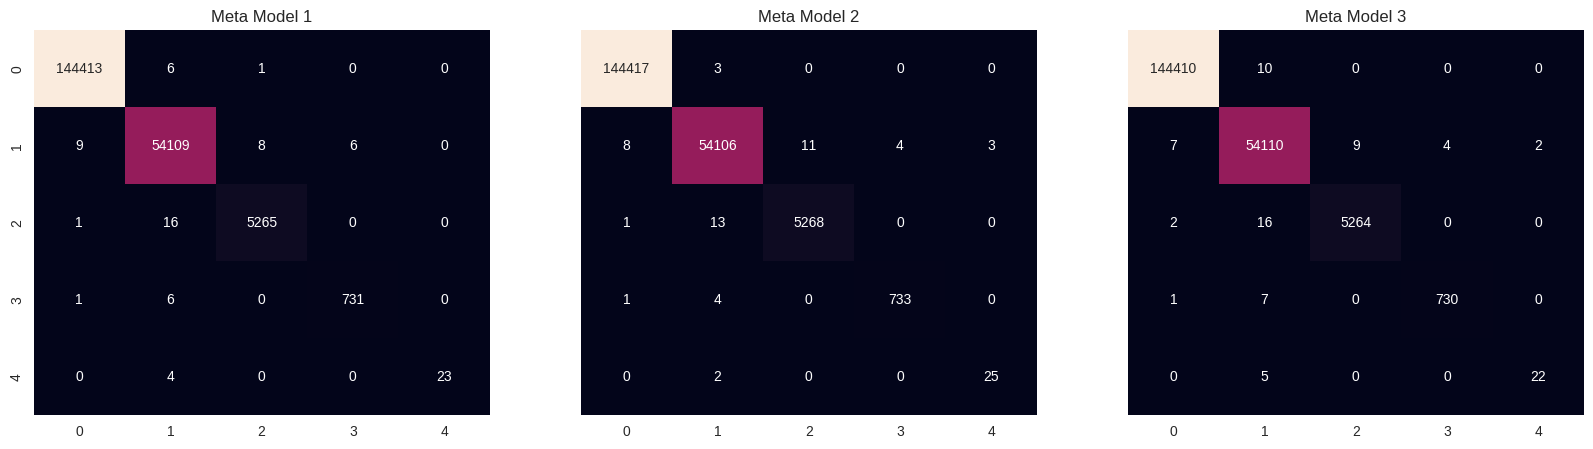

In [ ]:
plt.subplots(ncols=3, nrows=1,figsize=(20,5),sharey=True,sharex=True)
for i in range(len(l)):
    plt.subplot(1,3,i+1)
    sns.heatmap(stack_confusion_matrixs[i],annot=True,fmt="d",cbar=False)
    plt.title(stack_model_name[i])

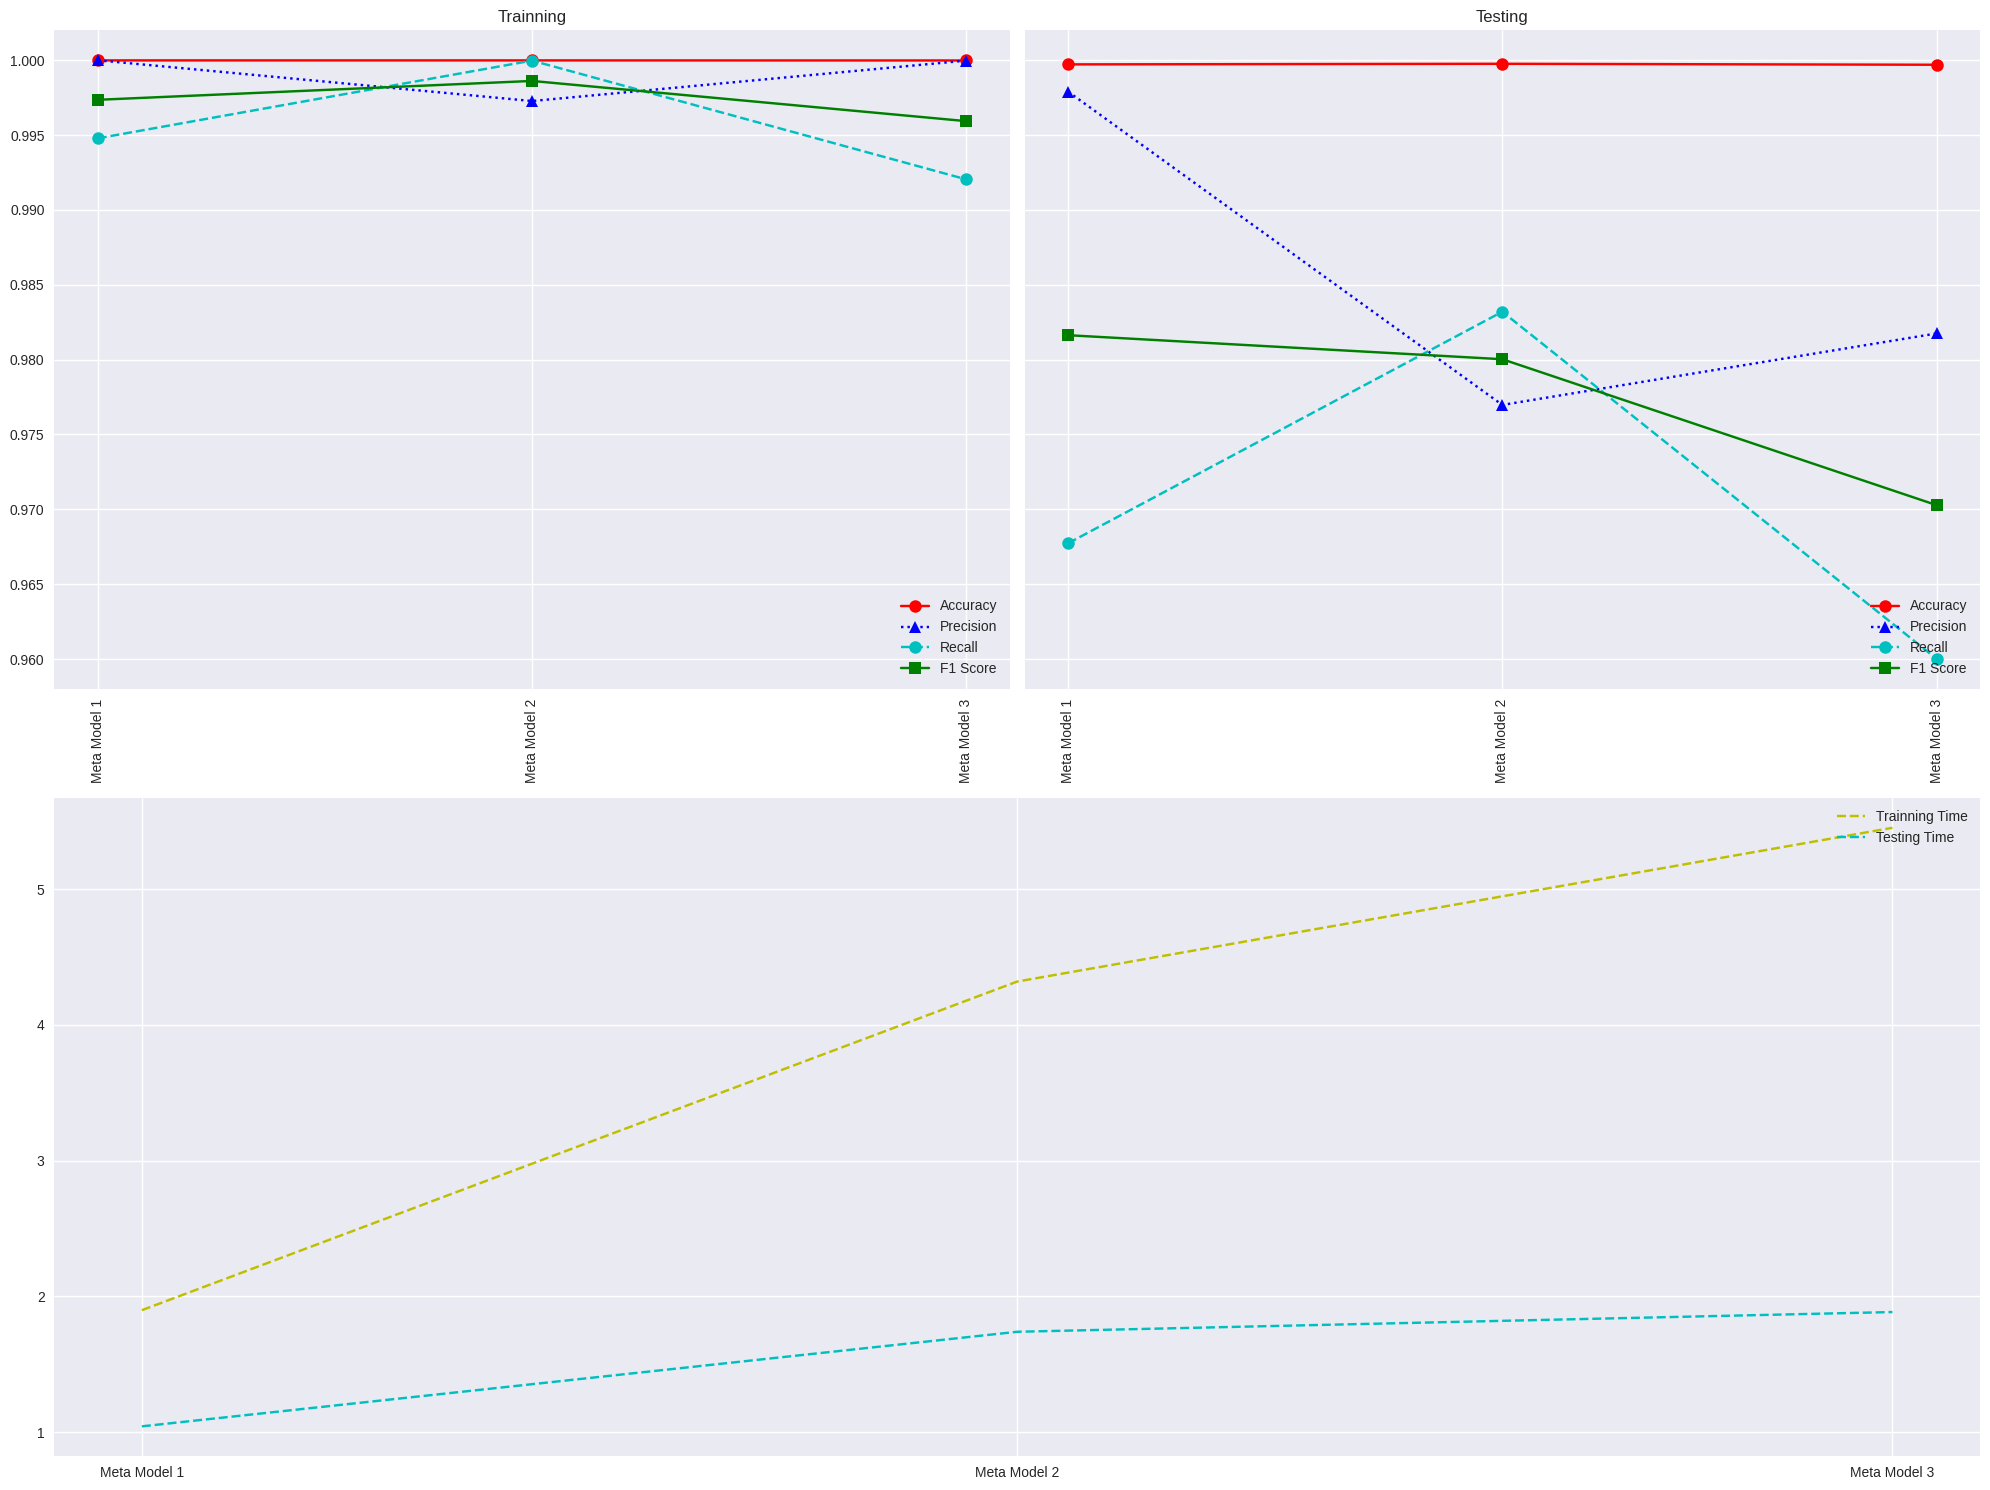

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(20,15),sharey=True)
gs = axs[1, 0].get_gridspec()
plt.subplot(2,2,1)
plt.plot(stack_model_name,stack_acc_train,'r',marker='o', markersize=9)
plt.plot(stack_model_name,stack_pres_train,'b:',marker='^', markersize=9)
plt.plot(stack_model_name,stack_rec_train,'c--',marker='o', markersize=9)
plt.plot(stack_model_name,stack_f1_train,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Trainning")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

plt.subplot(2,2,2)
plt.plot(stack_model_name,stack_acc_test,'r',marker='o', markersize=9)
plt.plot(stack_model_name,stack_pres_test,'b:',marker='^', markersize=9)
plt.plot(stack_model_name,stack_rec_test,'c--',marker='o', markersize=9)
plt.plot(stack_model_name,stack_f1_test,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Testing")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

for ax in axs[1,:]:
    ax.remove()
axbig = fig.add_subplot(gs[1,:])

plt.plot(stack_model_name,stack_train_time,'y--')
plt.plot(stack_model_name,stack_test_time,'c--')
plt.legend(['Trainning Time','Testing Time'],loc ="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
for i in range(len(stack_model_name)):
    print(stack_model_name[i]+" : "+str(stack_acc_test[i]*100))

Meta Model 1 : 99.97165186535614
Meta Model 2 : 99.97556195289322
Meta Model 3 : 99.96920806064546


In [ ]:
creator = {}
for i in range(len(l)):
    creator[stack_model_name[i]] = train_prediction[i]

df_ann = pd.DataFrame(creator)
df_ann.head()

,Meta Model 1,Meta Model 2,Meta Model 3
0,dos,dos,dos
1,dos,dos,dos
2,dos,dos,dos
3,dos,dos,dos
4,normal,normal,normal


In [ ]:
pmap = {'dos':0,'normal':1,'probe':2,'r2l':3,'u2r':4}
df_ann['Meta Model 1'] = df_ann['Meta Model 1'].map(pmap)
df_ann['Meta Model 2'] = df_ann['Meta Model 2'].map(pmap)
df_ann['Meta Model 3'] = df_ann['Meta Model 3'].map(pmap)

In [ ]:
### Creating dataset for ANN Model
creator = {}
for i in range(len(l)):
    creator[stack_model_name[i]] = test_prediction[i]

df_ann_test = pd.DataFrame(creator)
df_ann_test.head()

,Meta Model 1,Meta Model 2,Meta Model 3
0,dos,dos,dos
1,probe,probe,probe
2,dos,dos,dos
3,normal,normal,normal
4,dos,dos,dos


In [ ]:
pmap = {'dos':0,'normal':1,'probe':2,'r2l':3,'u2r':4}
df_ann_test['Meta Model 1'] = df_ann_test['Meta Model 1'].map(pmap)
df_ann_test['Meta Model 2'] = df_ann_test['Meta Model 2'].map(pmap)
df_ann_test['Meta Model 3'] = df_ann_test['Meta Model 3'].map(pmap)

In [ ]:
df_ann_test.head()
# df_ann_test.dtypes

,Meta Model 1,Meta Model 2,Meta Model 3
0,0,0,0
1,2,2,2
2,0,0,0
3,1,1,1
4,0,0,0


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def fun():
    model = Sequential()

    #here 30 is output dimension
    model.add(Dense(3,input_dim =3,activation = 'relu',kernel_initializer='random_uniform'))

    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))

    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))

    #loss is categorical_crossentropy which specifies that we have multiple classes

    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

    return model

In [ ]:
ann_model = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

In [ ]:
scaler = StandardScaler()
df_ann = scaler.fit_transform(df_ann)
df_ann_test = scaler.transform(df_ann_test)
ann_model.fit(df_ann, Y_train.values.ravel())

Epoch 1/100
6491/6491 [==============================] - 13s 2ms/step - loss: 0.3290 - accuracy: 0.9299
Epoch 2/100
6491/6491 [==============================] - 12s 2ms/step - loss: 0.1132 - accuracy: 0.9712
Epoch 3/100
6491/6491 [==============================] - 13s 2ms/step - loss: 0.1063 - accuracy: 0.9712
Epoch 4/100
6491/6491 [==============================] - 13s 2ms/step - loss: 0.1050 - accuracy: 0.9712
Epoch 5/100
6491/6491 [==============================] - 13s 2ms/step - loss: 0.0449 - accuracy: 0.9871
Epoch 6/100
6491/6491 [==============================] - 13s 2ms/step - loss: 0.0198 - accuracy: 0.9965
Epoch 7/100
6491/6491 [==============================] - 13s 2ms/step - loss: 0.0144 - accuracy: 0.9965
Epoch 8/100
6491/6491 [==============================] - 12s 2ms/step - loss: 0.0127 - accuracy: 0.9965
Epoch 9/100
6491/6491 [==============================] - 13s 2ms/step - loss: 0.0122 - accuracy: 0.9965
Epoch 10/100
6491/6491 [==============================] - 15s 2m

In [ ]:
Y_train_pred = ann_model.predict(df_ann)

In [ ]:
ann_acc_train = accuracy_score(Y_train,Y_train_pred)

In [ ]:
Y_test_pred = ann_model.predict(df_ann_test)
ann_acc_test = accuracy_score(Y_test,Y_test_pred)

In [ ]:
ann_pr_train = precision_score(Y_train,Y_train_pred,average="macro")
ann_pr_test = precision_score(Y_test, Y_test_pred,average="macro")

In [ ]:
ann_re_train = recall_score(Y_train,Y_train_pred,average="macro")
ann_re_test = recall_score(Y_test, Y_test_pred,average="macro")

In [ ]:
ann_f_train = f1_score(Y_train, Y_train_pred,average="macro")
ann_f_test = f1_score(Y_test, Y_test_pred,average="macro")

In [ ]:
creator_train = {}
creator_train['Model'] = model_name
creator_train['Accuracy'] = acc_train
creator_train['Precision'] = pres_train
creator_train['Recall'] = rec_train
creator_train['F1 Score'] = f1_train
training_ML_models = pd.DataFrame(creator_train)
training_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,Gaussian NaiveBayes,0.889122,0.889122,0.889122,0.889122
1,Decision Tree,0.987012,0.987012,0.987012,0.987012
2,RandomForest,0.999986,0.999986,0.999986,0.999986
3,SVM,0.993772,0.993772,0.993772,0.993772
4,LogisticRegression,0.978611,0.978611,0.978611,0.978611
5,GradientBoosting,0.993825,0.993825,0.993825,0.993825


In [ ]:
creator_test = {}
creator_test['Model'] = model_name
creator_test['Accuracy'] = acc_test
creator_test['Precision'] = pres_test
creator_test['Recall'] = rec_test
creator_test['F1 Score'] = f1_test
testing_ML_models = pd.DataFrame(creator_test)
testing_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,Gaussian NaiveBayes,0.889447,0.889447,0.889447,0.889447
1,Decision Tree,0.986911,0.986911,0.986911,0.986911
2,RandomForest,0.999717,0.999717,0.999717,0.999717
3,SVM,0.993407,0.993407,0.993407,0.993407
4,LogisticRegression,0.978959,0.978959,0.978959,0.978959
5,GradientBoosting,0.993900,0.993900,0.993900,0.993900


In [ ]:
stack_creator_train = {}
stack_creator_train['Model'] = stack_model_name
stack_creator_train['Accuracy'] = stack_acc_train
stack_creator_train['Precision'] = stack_pres_train
stack_creator_train['Recall'] = stack_rec_train
stack_creator_train['F1 Score'] = stack_f1_train
stack_training_ML_models = pd.DataFrame(stack_creator_train)
stack_training_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,Meta Model 1,0.999983,0.999992,0.994779,0.997351
1,Meta Model 2,0.999983,0.997268,0.999970,0.998611
2,Meta Model 3,0.999978,0.999970,0.992037,0.995926


In [ ]:
stack_creator_test = {}
stack_creator_test['Model'] = stack_model_name
stack_creator_test['Accuracy'] = stack_acc_test
stack_creator_test['Precision'] = stack_pres_test
stack_creator_test['Recall'] = stack_rec_test
stack_creator_test['F1 Score'] = stack_f1_test
stack_testing_ML_models = pd.DataFrame(stack_creator_test)
stack_testing_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,Meta Model 1,0.999717,0.997897,0.967735,0.981631
1,Meta Model 2,0.999756,0.976974,0.983200,0.980027
2,Meta Model 3,0.999692,0.981748,0.960018,0.970282


In [ ]:
ann_creator = {}
ann_creator['ANN'] = ['Trainning','Testing']
ann_creator['Accuracy'] = [ann_acc_train,ann_acc_test]
ann_creator['Precision'] = [ann_pr_train,ann_pr_test]
ann_creator['Recall'] = [ann_re_train,ann_re_test]
ann_creator['F1 Score'] = [ann_f_train,ann_f_test]
ann_models = pd.DataFrame(ann_creator)
ann_models

,ANN,Accuracy,Precision,Recall,F1 Score
0,Trainning,0.99980,0.789299,0.799972,0.794489
1,Testing,0.99958,0.791748,0.797305,0.794488


We can see tha meta Model 1 gives the best accuracy in testing. Thus, is the model we use, which is a combination of Decision Tree, Random Forest and Gradient Boosting.

